In [1]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
import pandas as pd

In [2]:
# Charger le jeu de données fusionné
df = pd.read_csv(r'C:\Users\jason\Desktop\Cours MS2D\Bejaoui\IA\Credit scoring project\merged_data_grouped.csv')


In [3]:
# Afficher les premières lignes du fichier
print("Aperçu du fichier CSV :")
print(df.head())

Aperçu du fichier CSV :
   SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100002       1         Cash loans           M            N   
2      100002       1         Cash loans           M            N   
3      100002       1         Cash loans           M            N   
4      100002       1         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               Y             0          202500.0    406597.5      24700.5   
2               Y             0          202500.0    406597.5      24700.5   
3               Y             0          202500.0    406597.5      24700.5   
4               Y             0          202500.0    406597.5      24700.5   

   ...  AMT_APPLICATION_sum  AMT_BALANCE_mean  AMT_BALANCE_max  \
0  ...            12.09545

In [4]:
# Vérifier les doublons dans le DataFrame
print("\nNombre de doublons dans le DataFrame fusionné :", df.duplicated().sum())

# Supprimer les doublons si nécessaire
df = df.drop_duplicates()
print("\nNombre de lignes après suppression des doublons :", len(df))

# Afficher des statistiques descriptives pour les colonnes numériques
print("\nStatistiques descriptives pour les colonnes numériques :")
print(df.describe())


Nombre de doublons dans le DataFrame fusionné : 0

Nombre de lignes après suppression des doublons : 1413189

Statistiques descriptives pour les colonnes numériques :
         SK_ID_CURR        TARGET  CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  1.413189e+06  1.413189e+06  1.413189e+06      1.413189e+06   
mean   2.783331e+05  8.057592e-02  4.235216e-01      1.724256e+05   
std    1.029407e+05  2.721828e-01  7.224406e-01      7.762969e+04   
min    1.000020e+05  0.000000e+00  0.000000e+00      4.518450e+04   
25%    1.888260e+05  0.000000e+00  0.000000e+00      1.125000e+05   
50%    2.783570e+05  0.000000e+00  0.000000e+00      1.575000e+05   
75%    3.674610e+05  0.000000e+00  1.000000e+00      2.160000e+05   
max    4.562550e+05  1.000000e+00  1.900000e+01      4.688235e+05   

         AMT_CREDIT   AMT_ANNUITY  SK_ID_BUREAU  AMT_CREDIT_SUM_mean  \
count  1.413189e+06  1.413189e+06  1.413189e+06         1.413189e+06   
mean   6.059073e+05  2.677449e+04  5.889347e+06         1.136641e+

In [5]:
# Afficher des statistiques descriptives pour les colonnes catégorielles
print("\nStatistiques descriptives pour les colonnes catégorielles :")
categorical_columns = df.select_dtypes(include=['object']).columns
print(df[categorical_columns].describe())


Statistiques descriptives pour les colonnes catégorielles :
       NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY
count             1413189     1413189      1413189         1413189
unique                  2           2            2               2
top            Cash loans           F            N               Y
freq              1295678      964787       908733          980657


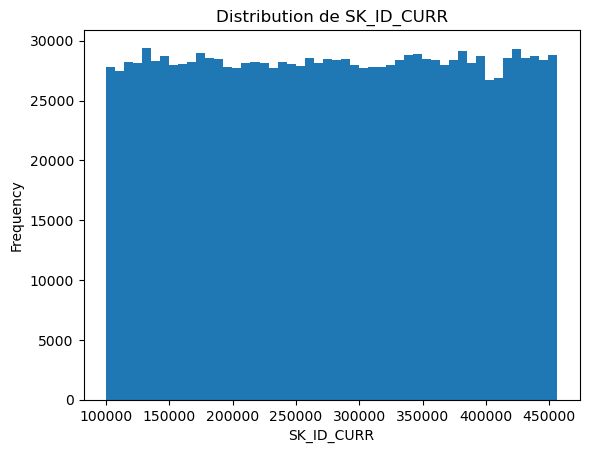

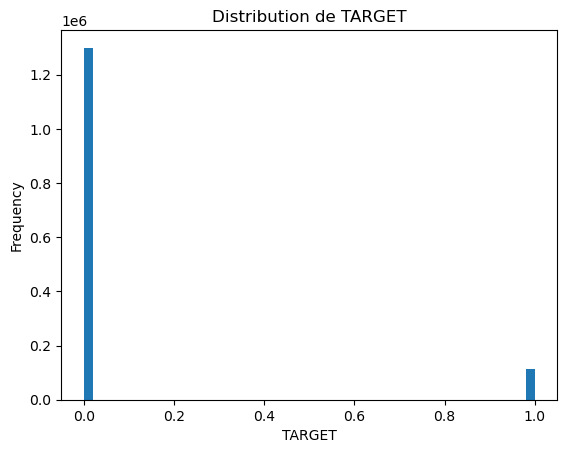

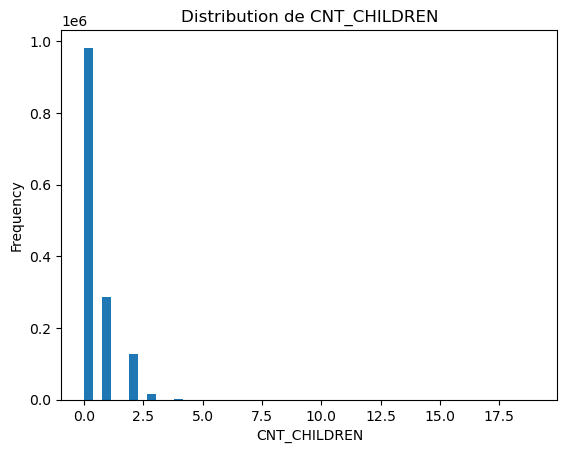

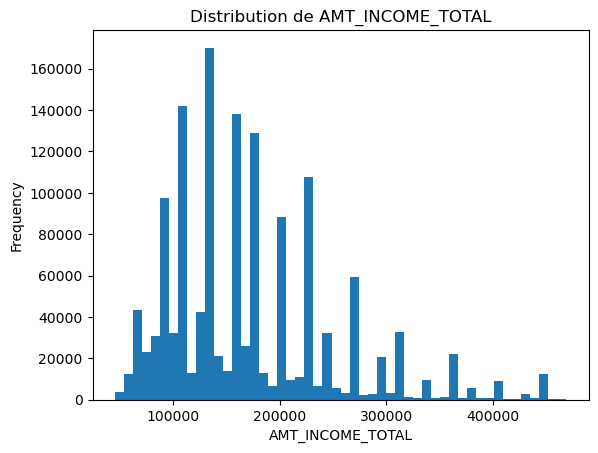

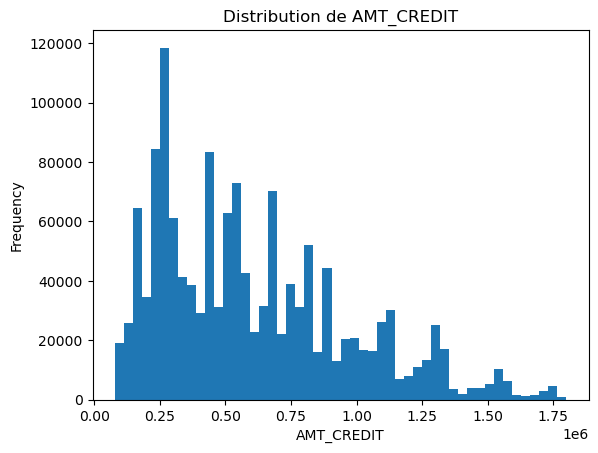

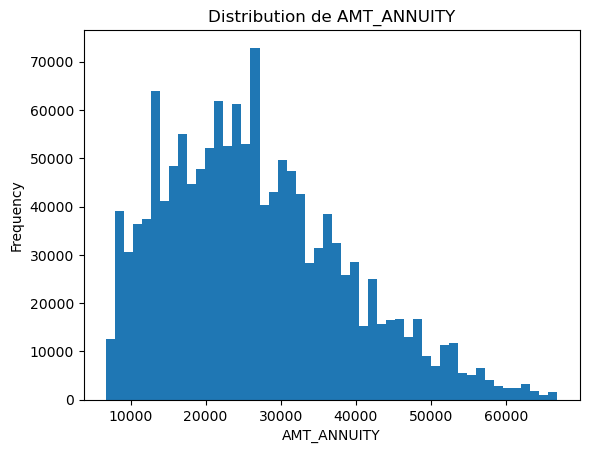

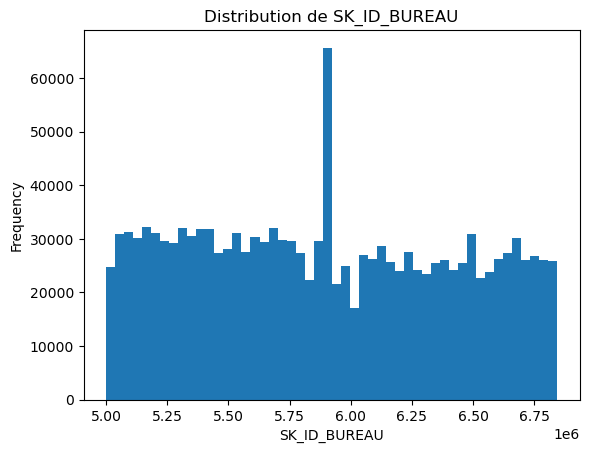

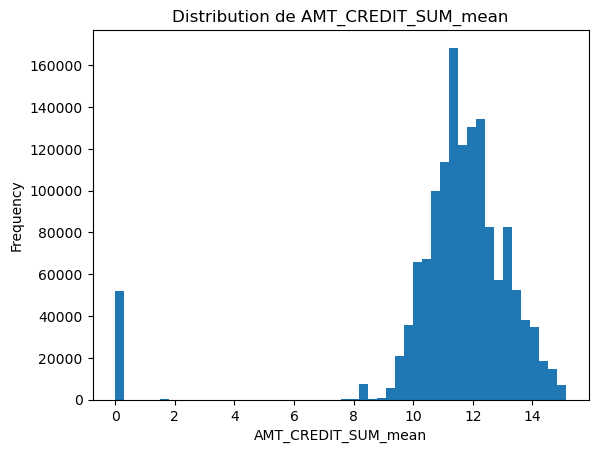

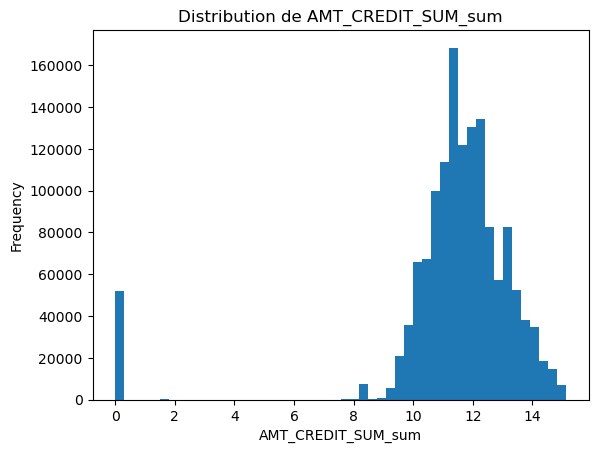

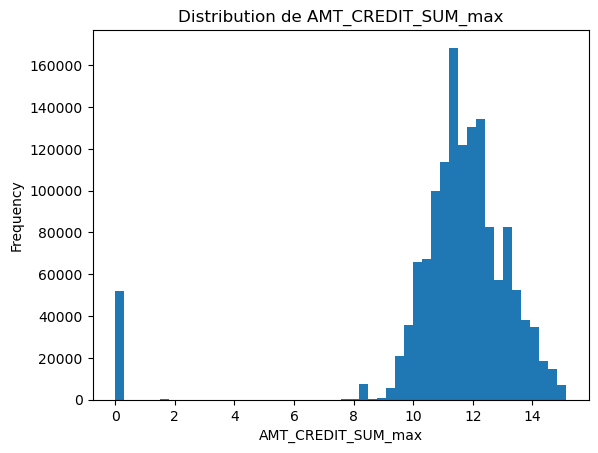

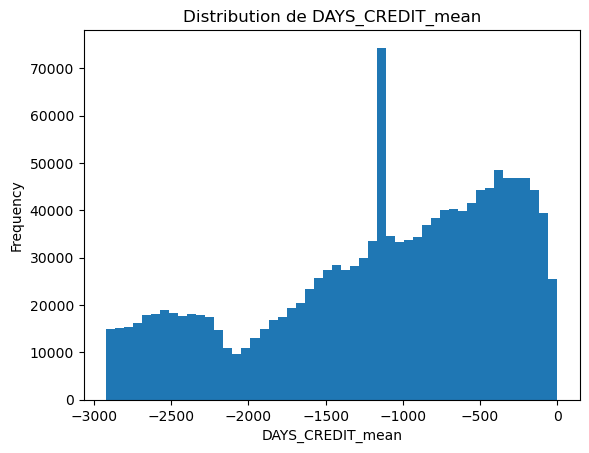

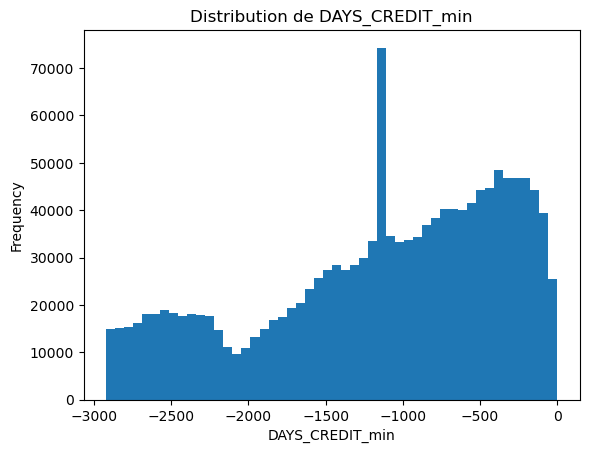

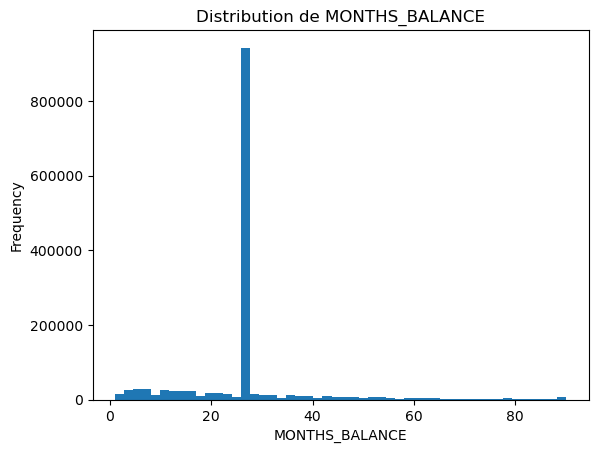

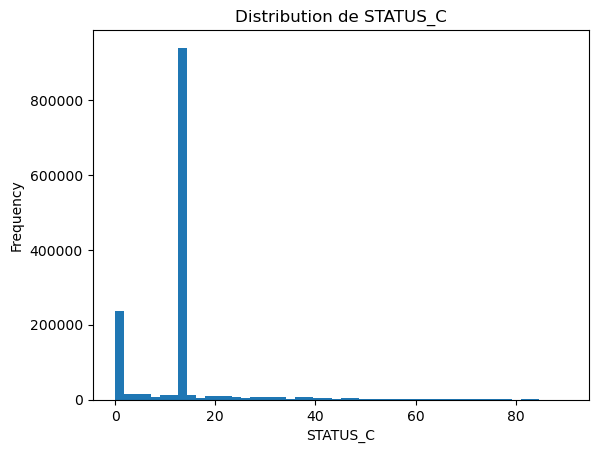

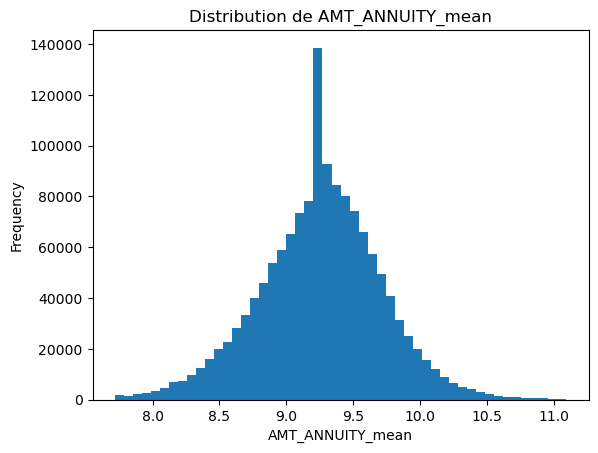

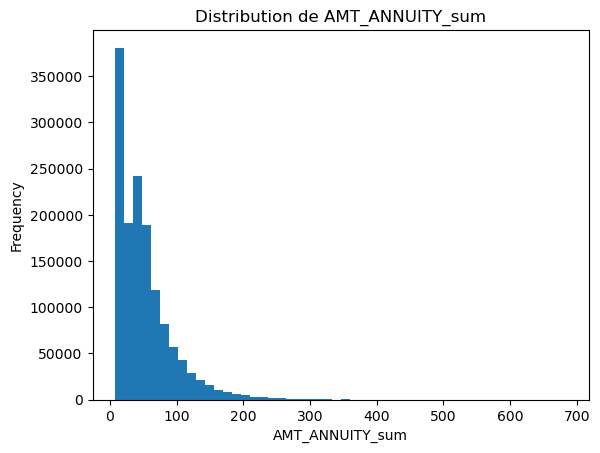

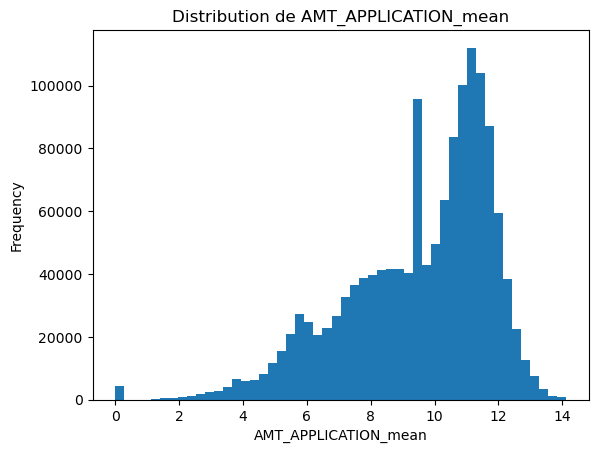

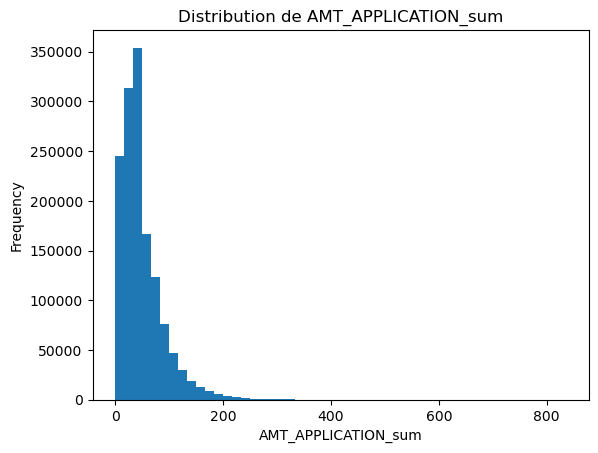

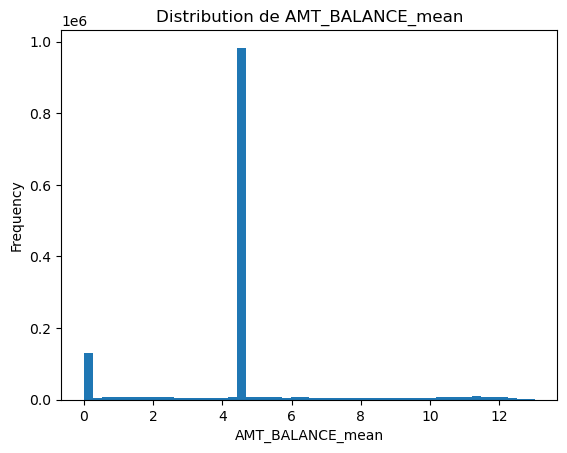

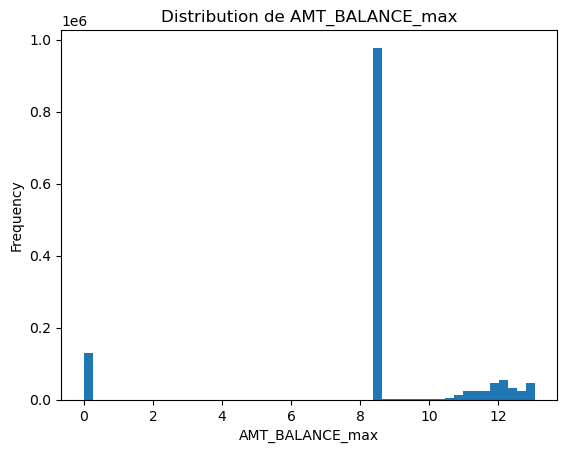

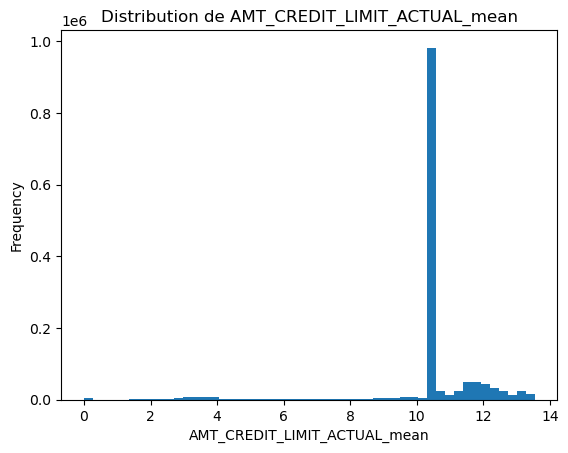

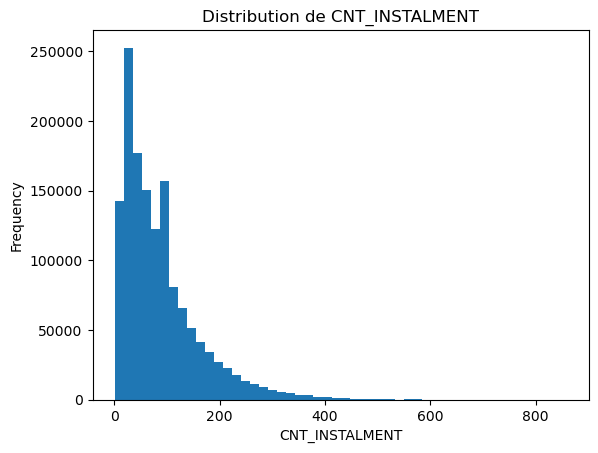

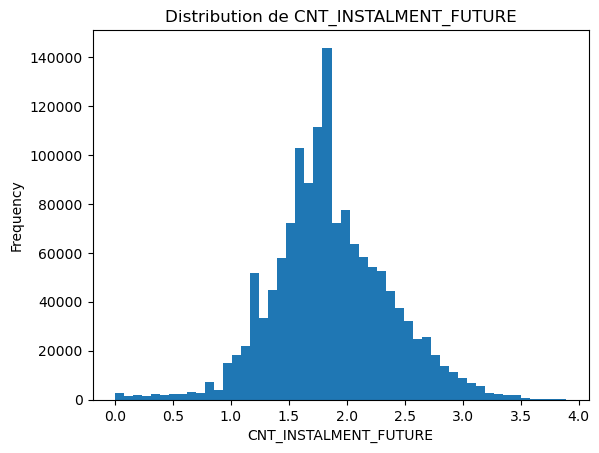

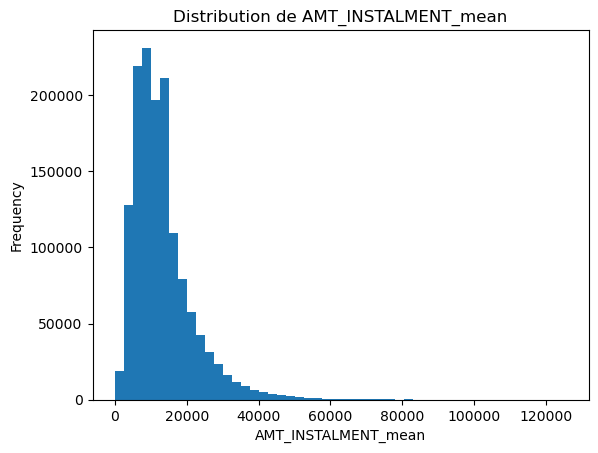

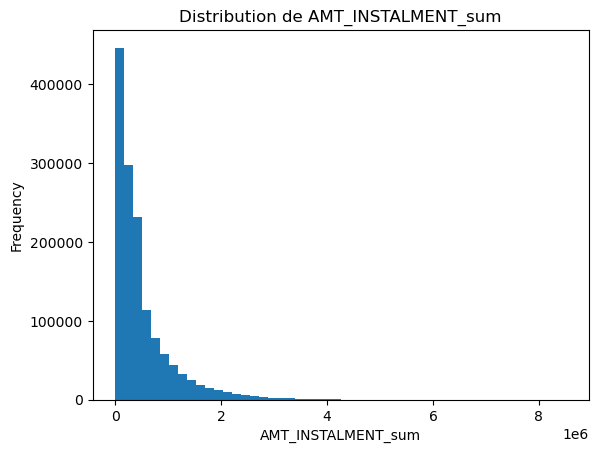

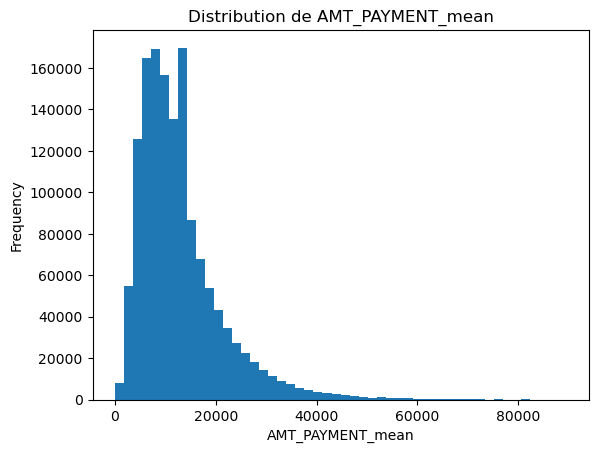

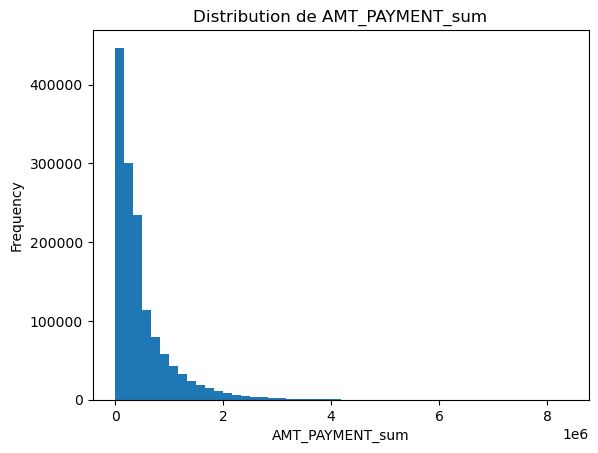


Corrélations entre les variables numériques :
                              SK_ID_CURR    TARGET  CNT_CHILDREN  \
SK_ID_CURR                      1.000000 -0.002912     -0.001511   
TARGET                         -0.002912  1.000000      0.017734   
CNT_CHILDREN                   -0.001511  0.017734      1.000000   
AMT_INCOME_TOTAL                0.002569 -0.008767      0.029653   
AMT_CREDIT                     -0.003487 -0.017728     -0.000247   
AMT_ANNUITY                    -0.002303  0.002482      0.026271   
SK_ID_BUREAU                   -0.000874 -0.008403      0.009639   
AMT_CREDIT_SUM_mean            -0.000453 -0.006335     -0.002307   
AMT_CREDIT_SUM_sum             -0.000453 -0.006335     -0.002307   
AMT_CREDIT_SUM_max             -0.000453 -0.006335     -0.002307   
DAYS_CREDIT_mean                0.001081  0.061122      0.014721   
DAYS_CREDIT_min                 0.001081  0.061122      0.014721   
MONTHS_BALANCE                 -0.001724 -0.035960     -0.009366   
S

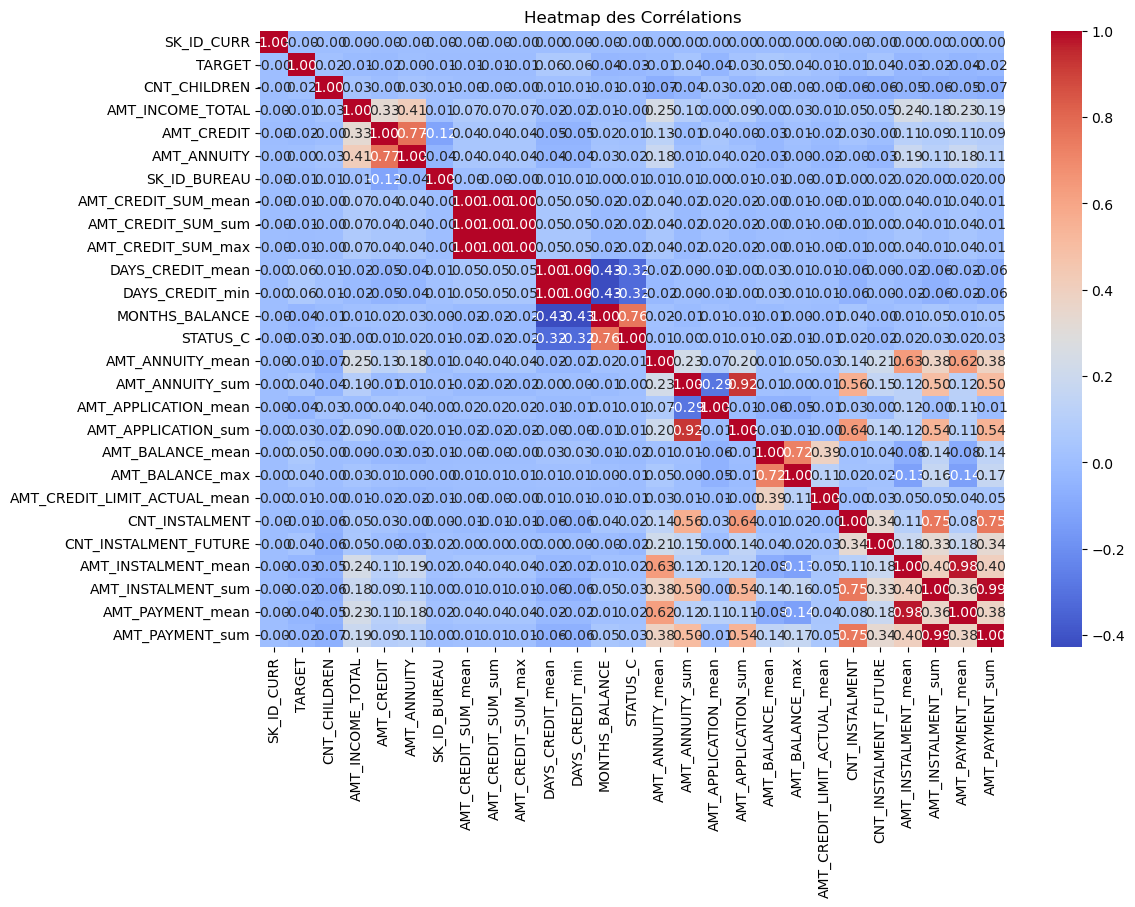

In [6]:
# Visualiser les distributions des colonnes numériques
import matplotlib.pyplot as plt

numeric_columns = df.select_dtypes(include='number').columns

for col in numeric_columns:
    plt.figure()
    df[col].plot(kind='hist', bins=50, title=f'Distribution de {col}')
    plt.xlabel(col)
    plt.show()

# Vérifier les corrélations entre les variables numériques en sélectionnant seulement les colonnes numériques
correlations = df[numeric_columns].corr()
print("\nCorrélations entre les variables numériques :")
print(correlations)

# Afficher une heatmap des corrélations
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.heatmap(correlations, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Heatmap des Corrélations")
plt.show()


In [7]:
# Réduire la taille des types de données numériques
for col in df.select_dtypes(include=['int64']).columns:
    df[col] = df[col].astype('int32')

for col in df.select_dtypes(include=['float64']).columns:
    df[col] = df[col].astype('float32')

# Prendre un échantillon aléatoire de 20% des données
df_sampled = df.sample(frac=0.2, random_state=42)

# Séparer la variable cible (TARGET) des prédicteurs
X = df_sampled.drop('TARGET', axis=1)
y = df_sampled['TARGET']

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Identifier les colonnes numériques et catégorielles
numeric_features = X.select_dtypes(include=['int32', 'float32']).columns
categorical_features = X.select_dtypes(include=['object']).columns

# Imputer les valeurs manquantes et standardiser les colonnes numériques
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Encoder les colonnes catégorielles
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Appliquer les transformations aux colonnes numériques et catégorielles
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Créer le pipeline final de transformation
pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

# Appliquer les transformations sur les ensembles d'entraînement et de test
X_train_transformed = pipeline.fit_transform(X_train)
X_test_transformed = pipeline.transform(X_test)

print("Préparation des données terminée. Les données sont prêtes pour l'entraînement du modèle.")

Préparation des données terminée. Les données sont prêtes pour l'entraînement du modèle.


In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

In [9]:
from sklearn.ensemble import RandomForestClassifier

In [10]:
from sklearn.model_selection import RandomizedSearchCV

In [11]:
# Définir des hyperparamètres simplifiés à rechercher
param_dist = {
    'n_estimators': [50, 100],  # Réduire le nombre d'estimateurs
    'max_depth': [10, 20],  # Réduire les profondeurs de l'arbre
    'min_samples_split': [2, 5],  # Réduire le nombre d'options
    'min_samples_leaf': [1, 2],  # Réduire le nombre de feuilles minimum
    'bootstrap': [True],  # Garder une seule option
    'class_weight': ['balanced']  # Garder une seule option
}

In [12]:
# Initialiser le modèle RandomForest
rf_model = RandomForestClassifier(random_state=42)

In [13]:
# Configurer la recherche aléatoire avec moins d'itérations et de "folds"
random_search = RandomizedSearchCV(
    estimator=rf_model,
    param_distributions=param_dist,
    n_iter=10,  # Réduire le nombre d'itérations
    cv=2,  # Moins de "folds" pour la validation croisée
    scoring='roc_auc',
    n_jobs=-1,
    random_state=42
)

In [14]:
# Exécuter la recherche par recherche aléatoire sur les données d'entraînement
random_search.fit(X_train_transformed, y_train)

RandomizedSearchCV(cv=2, estimator=RandomForestClassifier(random_state=42),
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True],
                                        'class_weight': ['balanced'],
                                        'max_depth': [10, 20],
                                        'min_samples_leaf': [1, 2],
                                        'min_samples_split': [2, 5],
                                        'n_estimators': [50, 100]},
                   random_state=42, scoring='roc_auc')

In [15]:
# Afficher les meilleurs paramètres
print("\nMeilleurs paramètres trouvés par RandomizedSearchCV :")
print(random_search.best_params_)


Meilleurs paramètres trouvés par RandomizedSearchCV :
{'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_depth': 20, 'class_weight': 'balanced', 'bootstrap': True}


In [16]:
# Utiliser les meilleurs paramètres pour entraîner le modèle optimisé
best_rf_model = RandomForestClassifier(
    n_estimators=100,
    min_samples_split=2,
    min_samples_leaf=2,
    max_depth=20,
    class_weight='balanced',
    bootstrap=True,
    random_state=42
)

In [17]:
# Entraîner le modèle optimisé
best_rf_model.fit(X_train_transformed, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=20,
                       min_samples_leaf=2, random_state=42)

In [18]:
# Prédire avec le modèle optimisé
y_pred_best_rf = best_rf_model.predict(X_test_transformed)
y_pred_best_rf_proba = best_rf_model.predict_proba(X_test_transformed)[:, 1]

In [19]:
# Afficher le rapport de classification
print("\nRapport de classification pour le modèle RandomForest optimisé :")
print(classification_report(y_test, y_pred_best_rf))


Rapport de classification pour le modèle RandomForest optimisé :
              precision    recall  f1-score   support

           0       0.93      1.00      0.96     77981
           1       0.80      0.19      0.31      6811

    accuracy                           0.93     84792
   macro avg       0.87      0.59      0.64     84792
weighted avg       0.92      0.93      0.91     84792



In [20]:
# Calculer et afficher le score AUC-ROC
roc_auc_best_rf = roc_auc_score(y_test, y_pred_best_rf_proba)
print("\nScore AUC-ROC pour le modèle RandomForest optimisé :", roc_auc_best_rf)


Score AUC-ROC pour le modèle RandomForest optimisé : 0.8038275904073859


In [21]:
from joblib import dump

In [22]:
# Sauvegarder le modèle entraîné dans un fichier
dump(best_rf_model, 'random_forest_model_optimised.joblib')

print("Le modèle a été sauvegardé avec succès sous le nom 'random_forest_model_optimised.joblib'.")

Le modèle a été sauvegardé avec succès sous le nom 'random_forest_model_optimised.joblib'.


In [23]:
from joblib import load

In [24]:
# Charger le modèle sauvegardé
loaded_model = load('random_forest_model_optimised.joblib')

# Utiliser le modèle chargé pour faire des prédictions
y_pred_loaded = loaded_model.predict(X_test_transformed)

In [25]:
# Sauvegarder le pipeline de transformation dans un fichier
dump(pipeline, 'pipeline.joblib')

print("Le pipeline a été sauvegardé avec succès sous le nom 'pipeline.joblib'.")

Le pipeline a été sauvegardé avec succès sous le nom 'pipeline.joblib'.
